In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [2]:
dbd_jakbar_df =pd.read_csv("DBD Jakarta Barat.csv")
dbd_jakbar_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Barat,185
1,2017 Feb,2017,Feb,Jakarta Barat,79
2,2017 Mar,2017,Mar,Jakarta Barat,112
3,2017 Apr,2017,Apr,Jakarta Barat,79
4,2017 May,2017,May,Jakarta Barat,81
5,2017 Jun,2017,Jun,Jakarta Barat,44
6,2017 Jul,2017,Jul,Jakarta Barat,44
7,2017 Aug,2017,Aug,Jakarta Barat,34
8,2017 Sep,2017,Sep,Jakarta Barat,24
9,2017 Oct,2017,Oct,Jakarta Barat,58


In [3]:
dbd_jakbar_df['Month Period'] = [ x+1 for x in range(0, len(dbd_jakbar_df))]

In [4]:
dbd_jakbar_df.rename(columns = {'Penderita': 'jml_penderita_jakbar'}, inplace=True)

In [5]:
dbd_jakbar_df

,Year&Month,Year,Month,Kota adm.,jml_penderita_jakbar,Month Period
0,2017 Jan,2017,Jan,Jakarta Barat,185,1
1,2017 Feb,2017,Feb,Jakarta Barat,79,2
2,2017 Mar,2017,Mar,Jakarta Barat,112,3
3,2017 Apr,2017,Apr,Jakarta Barat,79,4
4,2017 May,2017,May,Jakarta Barat,81,5
5,2017 Jun,2017,Jun,Jakarta Barat,44,6
6,2017 Jul,2017,Jul,Jakarta Barat,44,7
7,2017 Aug,2017,Aug,Jakarta Barat,34,8
8,2017 Sep,2017,Sep,Jakarta Barat,24,9
9,2017 Oct,2017,Oct,Jakarta Barat,58,10


In [6]:
dbd_jakbar_df = dbd_jakbar_df[['Month Period', 'Year&Month', 'jml_penderita_jakbar']]
dbd_jakbar_df

,Month Period,Year&Month,jml_penderita_jakbar
0,1,2017 Jan,185
1,2,2017 Feb,79
2,3,2017 Mar,112
3,4,2017 Apr,79
4,5,2017 May,81
5,6,2017 Jun,44
6,7,2017 Jul,44
7,8,2017 Aug,34
8,9,2017 Sep,24
9,10,2017 Oct,58


In [7]:
dbd_jakbar_df.describe()

,Month Period,jml_penderita_jakbar
count,48.00,48.000000
mean,24.50,87.270833
std,14.00,114.053131
min,1.00,2.000000
25%,12.75,24.750000
50%,24.50,44.500000
75%,36.25,84.500000
max,48.00,539.000000


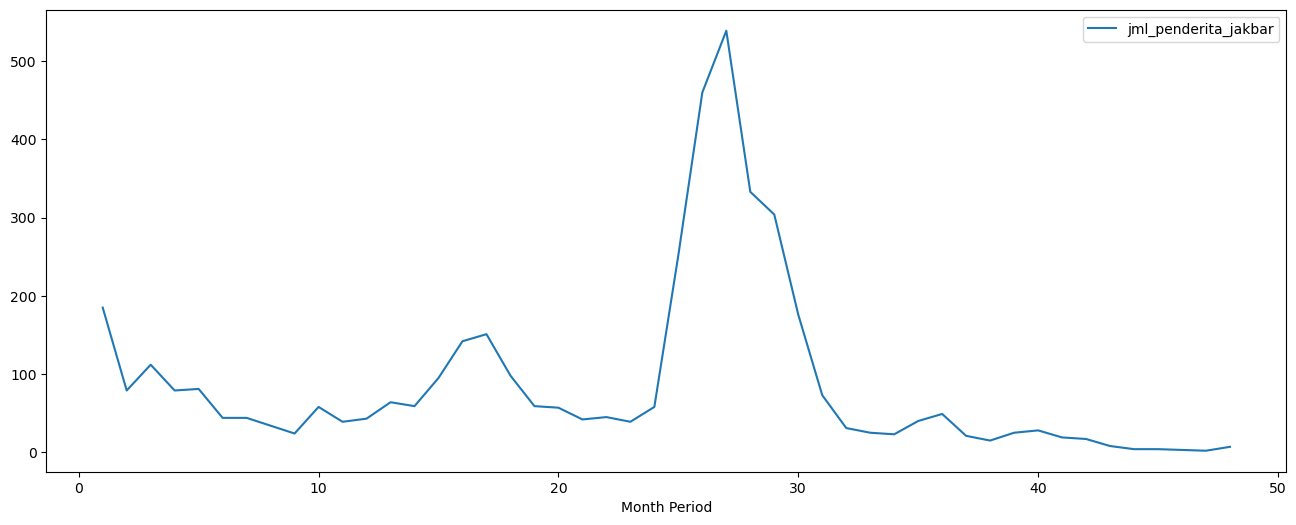

In [8]:
ax = dbd_jakbar_df.set_index('Month Period').plot(figsize=(16, 6))

In [9]:
dbd_jakpus_df =pd.read_csv("DBD Jakarta Pusat.csv")
dbd_jakpus_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Pusat,31
1,2017 Feb,2017,Feb,Jakarta Pusat,12
2,2017 Mar,2017,Mar,Jakarta Pusat,13
3,2017 Apr,2017,Apr,Jakarta Pusat,13
4,2017 May,2017,May,Jakarta Pusat,9
5,2017 Jun,2017,Jun,Jakarta Pusat,16
6,2017 Jul,2017,Jul,Jakarta Pusat,3
7,2017 Aug,2017,Aug,Jakarta Pusat,7
8,2017 Sep,2017,Sep,Jakarta Pusat,4
9,2017 Oct,2017,Oct,Jakarta Pusat,5


In [10]:
dbd_jakpus_df['Month Period'] = [ x+1 for x in range(0, len(dbd_jakpus_df))]

In [11]:
dbd_jakpus_df.rename(columns = {'Penderita': 'jml_penderita_jakpus'}, inplace=True)

In [12]:
dbd_jakpus_df

,Year&Month,Year,Month,Kota adm.,jml_penderita_jakpus,Month Period
0,2017 Jan,2017,Jan,Jakarta Pusat,31,1
1,2017 Feb,2017,Feb,Jakarta Pusat,12,2
2,2017 Mar,2017,Mar,Jakarta Pusat,13,3
3,2017 Apr,2017,Apr,Jakarta Pusat,13,4
4,2017 May,2017,May,Jakarta Pusat,9,5
5,2017 Jun,2017,Jun,Jakarta Pusat,16,6
6,2017 Jul,2017,Jul,Jakarta Pusat,3,7
7,2017 Aug,2017,Aug,Jakarta Pusat,7,8
8,2017 Sep,2017,Sep,Jakarta Pusat,4,9
9,2017 Oct,2017,Oct,Jakarta Pusat,5,10


In [13]:
dbd_jakpus_df = dbd_jakpus_df[['Month Period', 'Year&Month', 'jml_penderita_jakpus']]
dbd_jakpus_df

,Month Period,Year&Month,jml_penderita_jakpus
0,1,2017 Jan,31
1,2,2017 Feb,12
2,3,2017 Mar,13
3,4,2017 Apr,13
4,5,2017 May,9
5,6,2017 Jun,16
6,7,2017 Jul,3
7,8,2017 Aug,7
8,9,2017 Sep,4
9,10,2017 Oct,5


In [14]:
dbd_jakpus_df.describe()

,Month Period,jml_penderita_jakpus
count,48.00,48.000000
mean,24.50,22.979167
std,14.00,33.253693
min,1.00,0.000000
25%,12.75,4.000000
50%,24.50,8.500000
75%,36.25,23.500000
max,48.00,136.000000


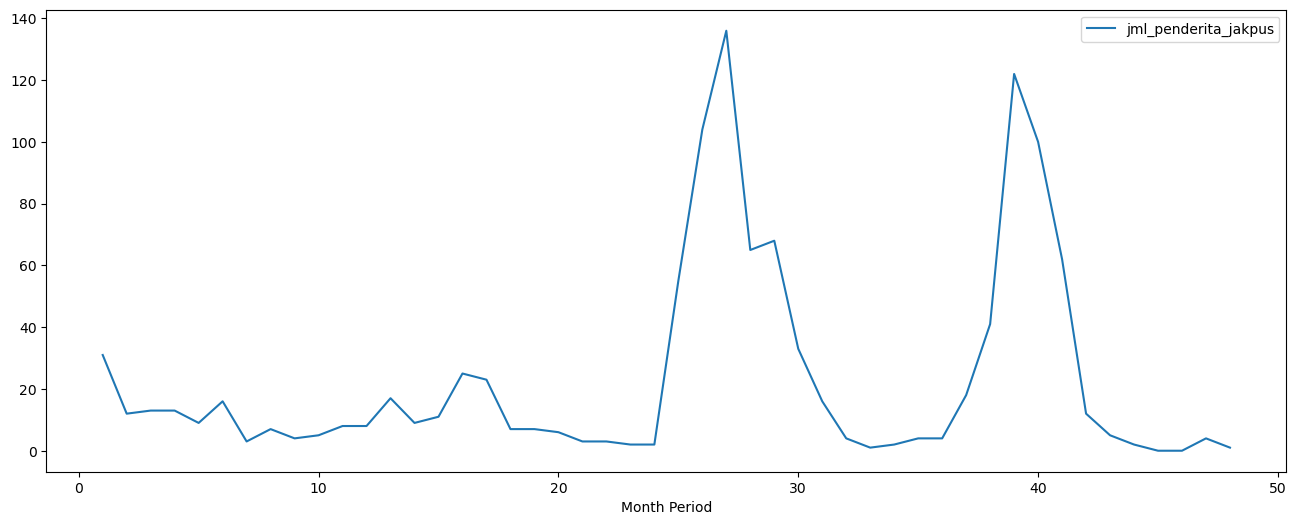

In [15]:
ax = dbd_jakpus_df.set_index('Month Period').plot(figsize=(16, 6))

In [16]:
dbd_jakut_df =pd.read_csv("DBD Jakarta Utara.csv")
dbd_jakut_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Utara,94
1,2017 Feb,2017,Feb,Jakarta Utara,54
2,2017 Mar,2017,Mar,Jakarta Utara,73
3,2017 Apr,2017,Apr,Jakarta Utara,49
4,2017 May,2017,May,Jakarta Utara,57
5,2017 Jun,2017,Jun,Jakarta Utara,23
6,2017 Jul,2017,Jul,Jakarta Utara,18
7,2017 Aug,2017,Aug,Jakarta Utara,11
8,2017 Sep,2017,Sep,Jakarta Utara,11
9,2017 Oct,2017,Oct,Jakarta Utara,53


In [17]:
dbd_jakut_df =pd.read_csv("DBD Jakarta Utara.csv")
dbd_jakut_df

,Year&Month,Year,Month,Kota adm.,Penderita
0,2017 Jan,2017,Jan,Jakarta Utara,94
1,2017 Feb,2017,Feb,Jakarta Utara,54
2,2017 Mar,2017,Mar,Jakarta Utara,73
3,2017 Apr,2017,Apr,Jakarta Utara,49
4,2017 May,2017,May,Jakarta Utara,57
5,2017 Jun,2017,Jun,Jakarta Utara,23
6,2017 Jul,2017,Jul,Jakarta Utara,18
7,2017 Aug,2017,Aug,Jakarta Utara,11
8,2017 Sep,2017,Sep,Jakarta Utara,11
9,2017 Oct,2017,Oct,Jakarta Utara,53


In [18]:
dbd_jakut_df['Month Period'] = [ x+1 for x in range(0, len(dbd_jakut_df))]

In [19]:
dbd_jakut_df.rename(columns = {'Penderita': 'jml_penderita_jakut'}, inplace=True)

In [20]:
dbd_jakut_df

,Year&Month,Year,Month,Kota adm.,jml_penderita_jakut,Month Period
0,2017 Jan,2017,Jan,Jakarta Utara,94,1
1,2017 Feb,2017,Feb,Jakarta Utara,54,2
2,2017 Mar,2017,Mar,Jakarta Utara,73,3
3,2017 Apr,2017,Apr,Jakarta Utara,49,4
4,2017 May,2017,May,Jakarta Utara,57,5
5,2017 Jun,2017,Jun,Jakarta Utara,23,6
6,2017 Jul,2017,Jul,Jakarta Utara,18,7
7,2017 Aug,2017,Aug,Jakarta Utara,11,8
8,2017 Sep,2017,Sep,Jakarta Utara,11,9
9,2017 Oct,2017,Oct,Jakarta Utara,53,10


In [21]:
dbd_jakut_df = dbd_jakut_df[['Month Period', 'Year&Month', 'jml_penderita_jakut']]
dbd_jakut_df

,Month Period,Year&Month,jml_penderita_jakut
0,1,2017 Jan,94
1,2,2017 Feb,54
2,3,2017 Mar,73
3,4,2017 Apr,49
4,5,2017 May,57
5,6,2017 Jun,23
6,7,2017 Jul,18
7,8,2017 Aug,11
8,9,2017 Sep,11
9,10,2017 Oct,53


In [22]:
dbd_jakut_df.describe()

,Month Period,jml_penderita_jakut
count,48.00,48.000000
mean,24.50,50.291667
std,14.00,52.608534
min,1.00,4.000000
25%,12.75,12.750000
50%,24.50,27.500000
75%,36.25,63.000000
max,48.00,221.000000


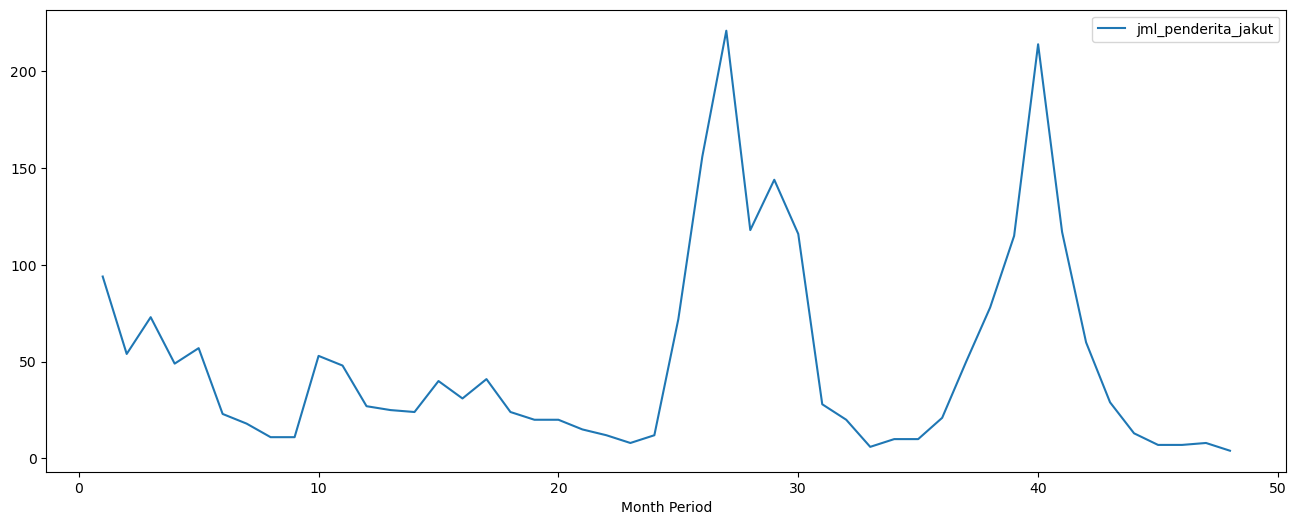

In [23]:
ax = dbd_jakut_df.set_index('Month Period').plot(figsize=(16, 6))

### Plot data

In [24]:
dbd =pd.read_csv("dbd.csv")
dbd

,Jakbar,Jakpus,Jakut
0,185,31,94
1,79,12,54
2,112,13,73
3,79,13,49
4,81,9,57
5,44,16,23
6,44,3,18
7,34,7,11
8,24,4,11
9,58,5,53


In [25]:
dbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jakbar  48 non-null     int64
 1   Jakpus  48 non-null     int64
 2   Jakut   48 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [26]:
dbd.describe()

,Jakbar,Jakpus,Jakut
count,48.000000,48.000000,48.000000
mean,110.437500,22.979167,50.270833
std,119.659251,33.253693,52.624216
min,11.000000,0.000000,4.000000
25%,39.000000,4.000000,12.750000
50%,59.000000,8.500000,27.500000
75%,144.250000,23.500000,63.000000
max,539.000000,136.000000,221.000000


In [27]:
dbd['Month Period'] = [ x+1 for x in range(0, len(dbd))]

In [28]:
dbd = dbd[['Month Period', 'Jakbar', 'Jakpus' ,'Jakut']]
dbd

,Month Period,Jakbar,Jakpus,Jakut
0,1,185,31,94
1,2,79,12,54
2,3,112,13,73
3,4,79,13,49
4,5,81,9,57
5,6,44,16,23
6,7,44,3,18
7,8,34,7,11
8,9,24,4,11
9,10,58,5,53


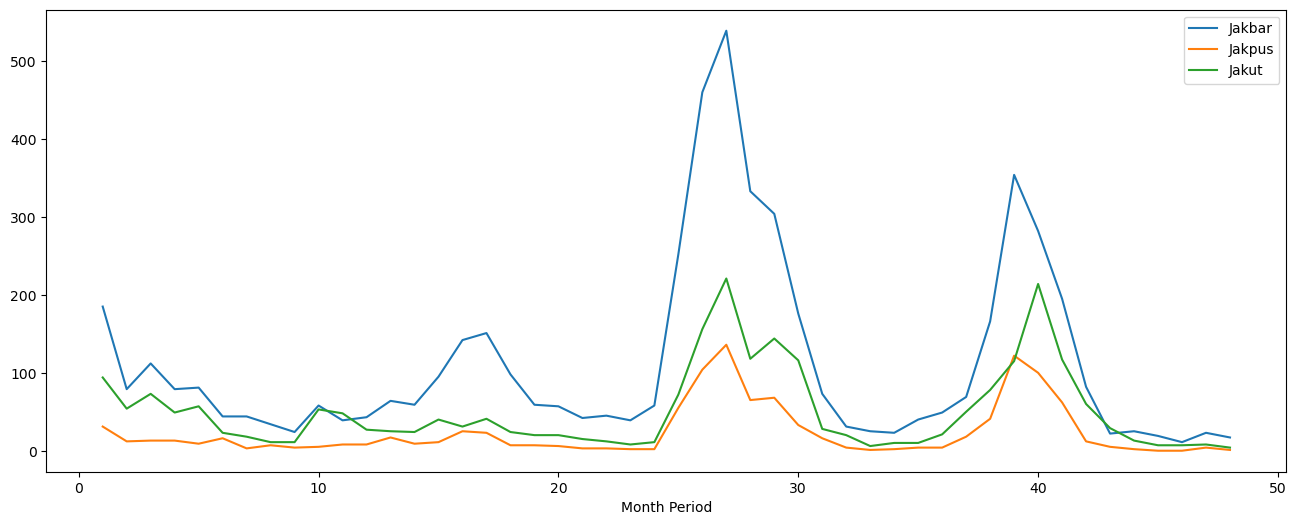

In [29]:
ax = dbd.set_index('Month Period').plot(figsize=(16, 6))

### Stasioner Data

Jakarta Barat

In [30]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    datatest = adfuller(series, autolag='AIC')
    dataoutput = pd.Series(datatest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in datatest[4].items():
       dataoutput['Critical Value (%s)'%key] = value
    print (dataoutput)
    if datatest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [31]:
Augmented_Dickey_Fuller_Test_func(dbd_jakbar_df['jml_penderita_jakbar'],'jml_penderita_jakbar')

Results of Dickey-Fuller Test for column: jml_penderita_jakbar
Test Statistic                 -2.984448
p-value                         0.036373
No Lags Used                    1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Jakarta Pusat

In [32]:
Augmented_Dickey_Fuller_Test_func(dbd_jakpus_df['jml_penderita_jakpus'],'jml_penderita_jakpus')

Results of Dickey-Fuller Test for column: jml_penderita_jakpus
Test Statistic                 -3.790059
p-value                         0.003011
No Lags Used                    2.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Jakarta Utara

In [33]:
Augmented_Dickey_Fuller_Test_func(dbd_jakut_df['jml_penderita_jakut'],'jml_penderita_jakut')

Results of Dickey-Fuller Test for column: jml_penderita_jakut
Test Statistic                 -3.699251
p-value                         0.004124
No Lags Used                    3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


### AIC

In [34]:
penderita_DBD = dbd[['Month Period', 'Jakbar', 'Jakpus', 'Jakut']]    

In [35]:
model = VAR (penderita_DBD)

In [36]:
res = model.select_order(5) 
res.summary()

,AIC,BIC,FPE,HQIC
0,25.27,25.43,9.386e+10,25.33
1,-45.77*,-44.95*,1.326e-20*,-45.47*
2,-41.61,-40.13,8.751e-19,-41.06
3,-42.57,-40.45,3.498e-19,-41.79
4,-39.20,-36.42,1.132e-17,-38.18
5,-40.36,-36.92,4.276e-18,-39.09


### Bobot Lokasi 

#### Lokasi Seragam

In [37]:
#W = 1/n
# n = jumlah lokasi yang berdekatan (2)
W = 1/2
print(W)

0.5


In [38]:
a = np.array ([0, 0.5, 0.5])
b = np.array ([0.5, 0, 0.5])
c = np.array ([0.5, 0.5, 0])
print(a)
print(b)
print(c)

[0.  0.5 0.5]
[0.5 0.  0.5]
[0.5 0.5 0. ]


### Estimasi Parameter

In [39]:
dbd =pd.read_csv("dbd.csv")
dbd

,Jakbar,Jakpus,Jakut
0,185,31,94
1,79,12,54
2,112,13,73
3,79,13,49
4,81,9,57
5,44,16,23
6,44,3,18
7,34,7,11
8,24,4,11
9,58,5,53


In [40]:
t1_seragam =pd.read_csv("dbd_t1.csv")
t1_seragam

,Jakbar,Jakpus,Jakut,wJakbar,wJakpus,wJakut,V1_t1,V2_t1,V3_t1
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,185,31,94,92.5,15.5,47.0,62.5,139.5,108.0
2,79,12,54,39.5,6.0,27.0,33.0,66.5,45.5
3,112,13,73,56.0,6.5,36.5,43.0,92.5,62.5
4,79,13,49,39.5,6.5,24.5,31.0,64.0,46.0
5,81,9,57,40.5,4.5,28.5,33.0,69.0,45.0
6,44,16,23,22.0,8.0,11.5,19.5,33.5,30.0
7,44,3,18,22.0,1.5,9.0,10.5,31.0,23.5
8,34,7,11,17.0,3.5,5.5,9.0,22.5,20.5
9,24,4,11,12.0,2.0,5.5,7.5,17.5,14.0


Lokasi 1/ Jakarta Barat

In [41]:
Z1_tmin1 = t1_seragam['Jakbar']
V1_tmin1 = t1_seragam['V1_t1']

X1 = pd.DataFrame()
X1['Z1_tmin1'] = Z1_tmin1
X1['V1_tmin1'] = V1_tmin1
X1

,Z1_tmin1,V1_tmin1
0,0,0.0
1,185,62.5
2,79,33.0
3,112,43.0
4,79,31.0
5,81,33.0
6,44,19.5
7,44,10.5
8,34,9.0
9,24,7.5


In [42]:
Z1_t = pd.DataFrame(dbd['Jakbar'])
Z1_t

,Jakbar
0,185
1,79
2,112
3,79
4,81
5,44
6,44
7,34
8,24
9,58


In [43]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.model_selection import train_test_split

In [44]:
X1_train, X1_test, Z1_train, Z1_test = train_test_split(X1, Z1_t, test_size = 0.1, random_state = 101)

In [45]:
# model = LinearRegression(fit_intercept=False)
# results = model.fit(X1, Z1_t)


sm1 = OLS(endog=Z1_train, exog=X1_train.assign(intercept=0))
# sm1 = OLS(endog=y1_train, exog=x1_train.assign(intercept=0))
result1 = sm1.fit()
result1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Jakbar   R-squared (uncentered):                   0.828
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              98.62
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    2.16e-16
Time:                        08:00:06   Log-Likelihood:                         -241.82
No. Observations:                  43   AIC:                                      487.6
Df Residuals:                      41   BIC:                                      491.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z1_tmin1       1.5819      0.262      6.049      0.000       1.054       2.110
V1_tmin1      -2.1741      0.761     -2.856      0.007      -3.711      -0.637
intercept           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       11.524   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.746
Skew:                           1.006   Prob(JB):                      0.00281
Kurtosis:                       4.583   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
result1.resid

1     -77.778847
44     -4.242883
21     -1.874692
16    -12.760985
45    -11.447543
43     27.156584
7     -12.777461
40     90.222898
3      -4.691863
39    -20.378167
14     37.537914
25    199.405505
15     47.154838
24    174.379157
41    -31.898338
37    130.764765
42    -29.452266
26     93.938405
10     10.295716
30    -43.452591
32      2.048813
35      0.941041
2      58.771335
27   -131.592187
47     -6.340114
34     16.659886
33     -8.939160
8     -10.219204
19     -6.984294
29    -74.457228
12     34.022960
5     -12.392537
0     185.000000
28    -23.857379
4      23.423196
13      3.411545
9      36.339053
46     13.207945
23      7.174839
6      16.789163
17    -71.302133
11     42.178432
31    -36.651810
dtype: float64

### Ljung Box

In [47]:
from statsmodels.stats import diagnostic

In [48]:
diagnostic.acorr_ljungbox(result1.resid, lags = 1)
#output (stat, p-value)

,lb_stat,lb_pvalue
1,0.876597,0.349135


hasil diatas Ho diterima jika alpha = 0.05

### Prediction with Data Train

Text(0, 0.5, 'predicted Z1_t')

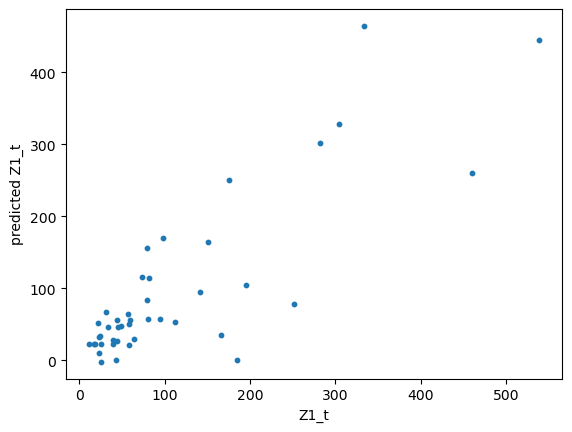

In [49]:
# result1.predict(X1.assign(intercept=0))
result1 = sm1.fit()
# predictions1 = result1.predict(x1_train.assign(intercept=0))
predictions1 = result1.predict(X1_train.assign(intercept=0))
# plt.scatter(y1_test, predictions1, s = 10)
plt.scatter(Z1_train, predictions1, s = 10)
plt.xlabel('Z1_t')
plt.ylabel('predicted Z1_t')

In [50]:
from sklearn import metrics

print('MAE : ', metrics.mean_absolute_error(Z1_train, predictions1))
print('MSE : ', metrics.mean_squared_error(Z1_train, predictions1))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z1_train, predictions1)))
print('R2 Score : ', metrics.r2_score(Z1_train, predictions1))

MAE :  43.8212946541045
MSE :  4488.839324177415
RMSE :  6.6197654531036445
R2 Score :  0.6780242971347555


### Prediction with Data Test

Text(0, 0.5, 'predicted Z1_t')

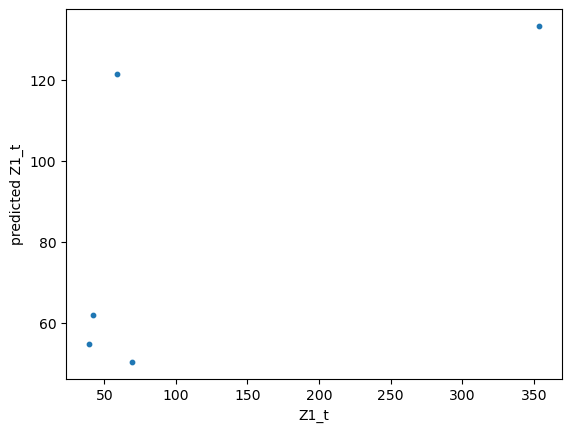

In [51]:
# result1.predict(X1.assign(intercept=0))
result1 = sm1.fit()
# predictions1 = result1.predict(x1_test.assign(intercept=0))
predictions1 = result1.predict(X1_test.assign(intercept=0))
# plt.scatter(y1_test, predictions1, s = 10)
plt.scatter(Z1_test, predictions1, s = 10)
plt.xlabel('Z1_t')
plt.ylabel('predicted Z1_t')

In [52]:
predictions1

36     50.339002
22     54.881604
20     61.907456
38    133.244269
18    121.331663
dtype: float64

### MAE, MSE, RMSE

In [53]:
from sklearn import metrics

print('MAE : ', metrics.mean_absolute_error(Z1_test, predictions1))
print('MSE : ', metrics.mean_squared_error(Z1_test, predictions1))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z1_test, predictions1)))
print('R2 Score : ', metrics.r2_score(Z1_test, predictions1))

MAE :  67.50749044504975
MSE :  10723.01879034063
RMSE :  8.21629420390055
R2 Score :  0.27003842177037807


Lokasi 2/ Jakarta Pusat

In [54]:
Z2_tmin1 = t1_seragam['Jakpus']
V2_tmin1 = t1_seragam['V2_t1']

X2 = pd.DataFrame()
X2['Z2_tmin1'] = Z2_tmin1
X2['V2_tmin1'] = V2_tmin1
X2

,Z2_tmin1,V2_tmin1
0,0,0.0
1,31,139.5
2,12,66.5
3,13,92.5
4,13,64.0
5,9,69.0
6,16,33.5
7,3,31.0
8,7,22.5
9,4,17.5


In [55]:
Z2_t = pd.DataFrame(dbd['Jakpus'])
Z2_t

,Jakpus
0,31
1,12
2,13
3,13
4,9
5,16
6,3
7,7
8,4
9,5


In [56]:
X2_train, X2_test, Z2_train, Z2_test = train_test_split(X2, Z2_t, test_size = 0.1, random_state = 101)

In [57]:
# model = LinearRegression(fit_intercept=False)
# results = model.fit(X1, Z1_t)


sm2 = OLS(endog=Z2_train, exog=X2_train.assign(intercept=0))
# sm1 = OLS(endog=y1_train, exog=x1_train.assign(intercept=0))
result2 = sm2.fit()
result2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Jakpus   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              59.03
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    8.52e-13
Time:                        08:00:07   Log-Likelihood:                         -188.27
No. Observations:                  43   AIC:                                      380.5
Df Residuals:                      41   BIC:                                      384.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z2_tmin1       0.4800      0.286      1.679      0.101      -0.097       1.058
V2_tmin1       0.1069      0.100      1.073      0.289      -0.094       0.308
intercept           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       14.820   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.674
Skew:                           1.103   Prob(JB):                     8.81e-05
Kurtosis:                       5.358   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
result2.resid

1    -17.791756
44    -2.990914
21    -1.486371
16     1.753440
45    -1.389525
43    -3.125782
7      2.246412
40   -12.511357
3     -3.127460
39    16.370843
14     2.243894
25    60.282458
15    12.504774
24    50.352344
41   -34.436467
37    25.999622
42    -8.349364
26    53.155311
10    -0.332378
30   -15.446588
32    -3.645747
35    -0.592303
2      0.131626
27   -40.901638
47    -2.576881
34     1.276302
33    -0.136776
8     -1.765192
19    -1.582263
29   -23.584962
12     9.418691
5      4.304514
0     31.000000
28    12.694813
4     -4.081193
13    -3.917045
9      1.209346
46     3.038021
23    -1.471904
6     -8.261258
17   -14.301912
11    -0.489844
31    -9.078329
dtype: float64

### Ljung Box

In [59]:
diagnostic.acorr_ljungbox(result2.resid, lags = 1)
#output (stat, p-value)

,lb_stat,lb_pvalue
1,0.289704,0.59041


### Prediction with Data Train

Text(0, 0.5, 'predicted Z2_t')

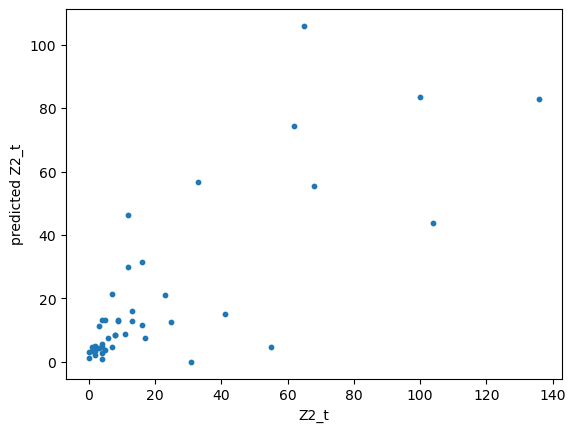

In [60]:
# result1.predict(X1.assign(intercept=0))
result2 = sm2.fit()
predictions2 = result2.predict(X2_train.assign(intercept=0))
plt.scatter(Z2_train, predictions2, s = 10)
plt.xlabel('Z2_t')
plt.ylabel('predicted Z2_t')

### MAE, MSE, RMSE

In [61]:
print('MAE : ', metrics.mean_absolute_error(Z2_train, predictions2))
print('MSE : ', metrics.mean_squared_error(Z2_train, predictions2))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z2_train, predictions2)))
print('R2 Score : ', metrics.r2_score(Z2_train, predictions2))

MAE :  11.752502833860143
MSE :  371.9722213522547
RMSE :  3.4281923566013828
R2 Score :  0.6100389536122692


### Prediction with Data Test

Text(0, 0.5, 'predicted Z2_t')

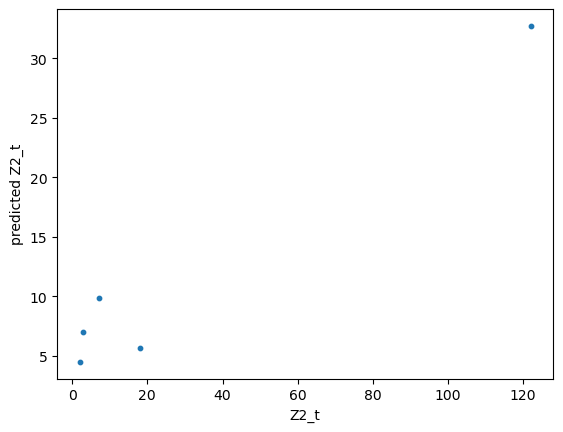

In [62]:
# result1.predict(X1.assign(intercept=0))
result2 = sm2.fit()
predictions2 = result2.predict(X2_test.assign(intercept=0))
plt.scatter(Z2_test, predictions2, s = 10)
plt.xlabel('Z2_t')
plt.ylabel('predicted Z2_t')

In [63]:
print('MAE : ', metrics.mean_absolute_error(Z2_test, predictions2))
print('MSE : ', metrics.mean_squared_error(Z2_test, predictions2))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z2_test, predictions2)))
print('R2 Score : ', metrics.r2_score(Z2_test, predictions2))

MAE :  22.1958554183039
MSE :  1630.664433242691
RMSE :  4.7112477559882056
R2 Score :  0.23437233161050064


Lokasi 3/ Jakarta Utara

In [64]:
Z3_tmin1 = t1_seragam['Jakut']
V3_tmin1 = t1_seragam['V3_t1']

X3 = pd.DataFrame()
X3['Z3_tmin1'] = Z3_tmin1
X3['V3_tmin1'] = V3_tmin1
X3

,Z3_tmin1,V3_tmin1
0,0,0.0
1,94,108.0
2,54,45.5
3,73,62.5
4,49,46.0
5,57,45.0
6,23,30.0
7,18,23.5
8,11,20.5
9,11,14.0


In [65]:
Z3_t = pd.DataFrame(dbd['Jakut'])
Z3_t

,Jakut
0,94
1,54
2,73
3,49
4,57
5,23
6,18
7,11
8,11
9,53


In [66]:
X3_train, X3_test, Z3_train, Z3_test = train_test_split(X3, Z3_t, test_size = 0.1, random_state = 101)

In [67]:
# model = LinearRegression(fit_intercept=False)
# results = model.fit(X1, Z1_t)


sm3 = OLS(endog=Z3_train, exog=X3_train.assign(intercept=0))
# sm1 = OLS(endog=y1_train, exog=x1_train.assign(intercept=0))
result3 = sm3.fit()
result3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Jakut   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              94.97
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    4.08e-16
Time:                        08:00:08   Log-Likelihood:                         -208.89
No. Observations:                  43   AIC:                                      421.8
Df Residuals:                      41   BIC:                                      425.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z3_tmin1      -0.1903      0.210     -0.906      0.370      -0.615       0.234
V3_tmin1       0.7714      0.152      5.092      0.000       0.465       1.077
intercept           0          0        nan        nan           0           0
==============================================================================
Omnibus:                        9.643   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               20.033
Skew:                          -0.306   Prob(JB):                     4.47e-05
Kurtosis:                       6.288   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
result3.resid

1     -11.425815
44     -0.940389
21     -2.502451
16    -17.513544
45      1.003590
43      8.103938
7      -3.703040
40     10.380408
3      14.677221
39     52.287821
14     18.338879
25     51.289520
15     -2.273400
24     50.950965
41    -16.863302
37     53.957607
42      4.160410
26     33.147294
10     33.785222
30    -30.539965
32     -3.694097
35      5.931897
2      48.175888
27   -100.297847
47     -4.891741
34      2.260200
33      1.113418
8      -2.720732
19     -1.650802
29     -0.081520
12     10.466593
5      -0.867601
0      94.000000
28     12.943245
4      30.838836
13     -2.484953
9      44.293370
46      5.089191
23     -3.291543
6      -0.765790
17    -35.310741
11     18.005073
31     -8.999743
dtype: float64

### Ljung Box

In [69]:
diagnostic.acorr_ljungbox(result3.resid, lags = 1)
#output (stat, p-value)

,lb_stat,lb_pvalue
1,0.796658,0.372094


### Prediction with Data Train

Text(0, 0.5, 'predicted Z3_t')

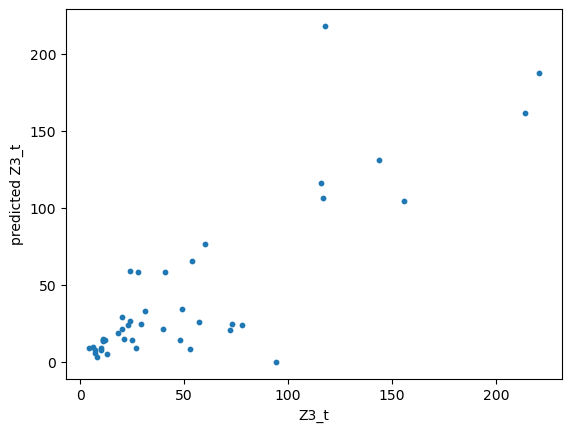

In [70]:
# result1.predict(X1.assign(intercept=0))
result3 = sm3.fit()
predictions3 = result3.predict(X3_train.assign(intercept=0))
plt.scatter(Z3_train, predictions3, s = 10)
plt.xlabel('Z3_t')
plt.ylabel('predicted Z3_t')

### MAE, MSE, RMSE

In [71]:
print('MAE : ', metrics.mean_absolute_error(Z3_train, predictions3))
print('MSE : ', metrics.mean_squared_error(Z3_train, predictions3))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z3_train, predictions3)))
print('R2 Score : ', metrics.r2_score(Z3_train, predictions3))

MAE :  19.90743262347488
MSE :  970.4229526809584
RMSE :  4.461774604736873
R2 Score :  0.6579002082161566


### Prediction with Data Test

Text(0, 0.5, 'predicted Z3_t')

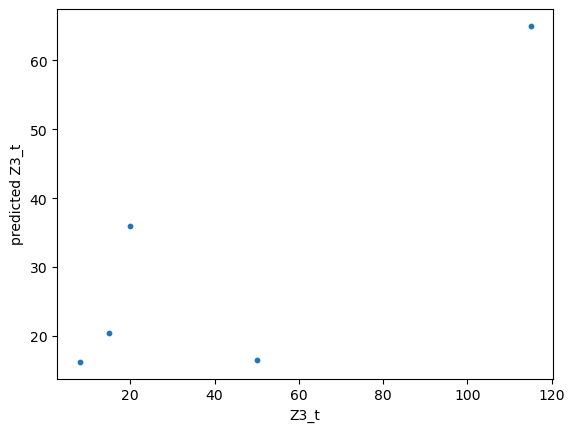

In [72]:
# result1.predict(X1.assign(intercept=0))
result3 = sm3.fit()
predictions3 = result3.predict(X3_test.assign(intercept=0))
plt.scatter(Z3_test, predictions3, s = 10)
plt.xlabel('Z3_t')
plt.ylabel('predicted Z3_t')

In [73]:
print('MAE : ', metrics.mean_absolute_error(Z3_test, predictions3))
print('MSE : ', metrics.mean_squared_error(Z3_test, predictions3))
print('RMSE : ', np.sqrt(metrics.mean_absolute_error(Z3_test, predictions3)))
print('R2 Score : ', metrics.r2_score(Z3_test, predictions3))

MAE :  22.64216421203295
MSE :  795.5414225530799
RMSE :  4.758378317455743
R2 Score :  0.48748813163358773
